In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
teams = pd.read_csv('../../../data/MDataFiles_Stage1/MTeams.csv')
seasons = pd.read_csv('../../../data/MDataFiles_Stage1/MSeasons.csv')
seeds = pd.read_csv('../../../data/MDataFiles_Stage1/MNCAATourneySeeds.csv')
coaches=pd.read_csv('../../../data/MDataFiles_Stage1/MTeamCoaches.csv')


In [3]:
regular_results = pd.read_csv('../../../data/MDataFiles_Stage1/MRegularSeasonCompactResults.csv')
bracket_res = pd.read_csv('../../../data/MDataFiles_Stage1/MNCAATourneyCompactResults.csv')

In [4]:
regular_detail = pd.read_csv('../../../data/MDataFiles_Stage1/MRegularSeasonDetailedResults.csv')
bracket_detail = pd.read_csv('../../../data/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv')

In [5]:
cities=pd.read_csv('../../../data/MDataFiles_Stage1/Cities.csv')
cities_games = pd.read_csv('../../../data/MDataFiles_Stage1/MGameCities.csv')

In [6]:
ranks=pd.read_csv('../../../data/MDataFiles_Stage1/MMasseyOrdinals.csv')


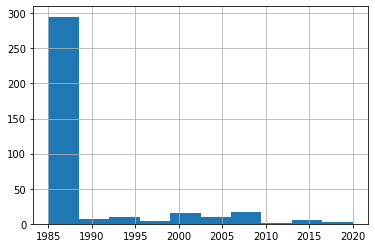

In [7]:
teams['FirstD1Season'].hist()

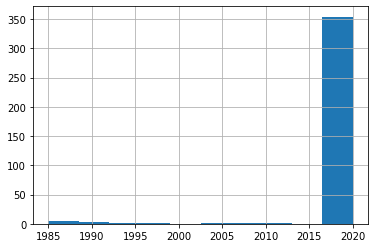

In [8]:
teams['LastD1Season'].hist()

In [9]:
regular_results.sample(4)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
8274,1987,53,1157,78,1254,53,N,0
85413,2005,75,1149,76,1219,74,H,0
117371,2011,103,1196,61,1397,60,H,0
136244,2015,48,1268,73,1329,64,A,0


In [10]:
nb_Adverse=regular_detail[regular_detail['WLoc']=='A'].shape[0]
nb_Home=regular_detail[regular_detail['WLoc']=='H'].shape[0]
nb_Neutral=regular_detail[regular_detail['WLoc']=='N'].shape[0]
print("Pourcentage de matchs gagnés à la maison si le match se joue à domicile ou sur le terrain adverse")
print(nb_Home/(nb_Home+nb_Adverse))

print("Pourcentage de matchs perdus à la maison si le match se joue à domicile ou sur le terrain adverse")
print(nb_Adverse/(nb_Home+nb_Adverse))

Pourcentage de matchs gagnés à la maison si le match se joue à domicile ou sur le terrain adverse
0.6594853914282806
Pourcentage de matchs perdus à la maison si le match se joue à domicile ou sur le terrain adverse
0.34051460857171945


## Etude saison par saison

In [301]:
victories_per_year=regular_results.groupby(['WTeamID', 'Season'], as_index=False).agg('count')
victories_per_year.head(3)

,WTeamID,Season,DayNum,WScore,LTeamID,LScore,WLoc,NumOT
0,1101,2014,2,2,2,2,2,2
1,1101,2015,7,7,7,7,7,7
2,1101,2016,9,9,9,9,9,9


In [302]:
victories_per_year['Nombre_victoires']=victories_per_year['DayNum']
victories_per_year.drop([ 'WScore', 'DayNum', 'LTeamID', 'LScore', 'WLoc', 'NumOT'], axis=1, inplace=True)

In [303]:
victories_per_year['Nombre_défaites']=regular_results.groupby(['LTeamID', 'Season'], as_index=False).agg('count')['DayNum']
#victories_per_year['Nombre_défaites'].fillna(0, inplace=True)
victories_per_year['Nombre_défaites']=victories_per_year['Nombre_défaites'].astype('int64',copy=False)
victories_per_year.head(3)

,WTeamID,Season,Nombre_victoires,Nombre_défaites
0,1101,2014,2,19
1,1101,2015,7,21
2,1101,2016,9,18


In [304]:
victories_per_year['Nombre_matchs']=victories_per_year['Nombre_défaites']+victories_per_year['Nombre_victoires']

victories_per_year['Pourcentage_Victoire']=victories_per_year['Nombre_victoires']/victories_per_year['Nombre_matchs']

In [305]:
# Feature qualité de la défense (buts encaissés, ?)
victories_per_year['Buts_moyens_encaissés_V']=regular_detail.groupby(['WTeamID', 'Season'], as_index=False).sum()['LScore']
#victories_per_year.dropna(inplace=True)

In [306]:
victories_per_year['Buts_moyens_encaissés_D']=regular_detail.groupby(['LTeamID', 'Season'], as_index=False).sum()['WScore']
victories_per_year.dropna(inplace=True)

victories_per_year.sample(12)
victories_per_year.isna().sum()

WTeamID                    0
Season                     0
Nombre_victoires           0
Nombre_défaites            0
Nombre_matchs              0
Pourcentage_Victoire       0
Buts_moyens_encaissés_V    0
Buts_moyens_encaissés_D    0
dtype: int64

In [307]:
victories_per_year['Buts_moyens_encaissés']=(victories_per_year['Buts_moyens_encaissés_V']+victories_per_year['Buts_moyens_encaissés_D'])/victories_per_year['Nombre_matchs']
victories_per_year.sample(3)

,WTeamID,Season,Nombre_victoires,Nombre_défaites,Nombre_matchs,Pourcentage_Victoire,Buts_moyens_encaissés_V,Buts_moyens_encaissés_D,Buts_moyens_encaissés
2718,1190,2015,14,22,36,0.388889,312.0,2011.0,64.527778
893,1132,2019,20,12,32,0.625000,1347.0,825.0,67.875000
4404,1246,1992,26,10,36,0.722222,751.0,1418.0,60.250000


In [308]:
# Feature qualité de l'attaque
victories_per_year['Buts_moyens_marqués_V']=regular_detail.groupby(['WTeamID', 'Season'], as_index=False).sum()['WScore']
victories_per_year['Buts_moyens_marqués_D']=regular_detail.groupby(['LTeamID', 'Season'], as_index=False).sum()['LScore']
#victories_per_year.dropna(inplace=True)
victories_per_year['Buts_moyens_marqués']=(victories_per_year['Buts_moyens_marqués_V']+victories_per_year['Buts_moyens_marqués_D'])/victories_per_year['Nombre_matchs']
victories_per_year['Moyenne_diff_score']=victories_per_year['Buts_moyens_marqués']-victories_per_year['Buts_moyens_encaissés']

In [309]:
victories_per_year.sample(2)

,WTeamID,Season,Nombre_victoires,Nombre_défaites,Nombre_matchs,Pourcentage_Victoire,Buts_moyens_encaissés_V,Buts_moyens_encaissés_D,Buts_moyens_encaissés,Buts_moyens_marqués_V,Buts_moyens_marqués_D,Buts_moyens_marqués,Moyenne_diff_score
52,1103,1996,2,23,25,0.08,976.0,1024.0,80.000000,1152,914,82.640000,2.640000
2858,1195,2012,14,21,35,0.40,938.0,782.0,49.142857,1121,649,50.571429,1.428571


In [310]:
# Feature mental (% de matchs gagnés sur terrain adverse)
victories_per_year['Victoires_sur_terrain_adverse']=regular_detail[regular_detail['WLoc']=='A'].groupby(['WTeamID', 'Season'], as_index=False).count()['NumOT']
victories_per_year['Victoires_sur_terrain_adverse'].fillna(0, inplace=True)
victories_per_year['Défaites_sur_terrain_adverse']=regular_detail[regular_detail['WLoc']=='H'].groupby(['LTeamID', 'Season'], as_index=False).count()['NumOT']
M=victories_per_year['Défaites_sur_terrain_adverse'].max()
victories_per_year['Défaites_sur_terrain_adverse'].fillna(M, inplace=True)
victories_per_year['Pourcentage_V_terrain_adverse']=victories_per_year['Victoires_sur_terrain_adverse']/(victories_per_year['Victoires_sur_terrain_adverse']+victories_per_year['Défaites_sur_terrain_adverse'])


In [311]:
victories_per_year.head(3)

,WTeamID,Season,Nombre_victoires,Nombre_défaites,Nombre_matchs,Pourcentage_Victoire,Buts_moyens_encaissés_V,Buts_moyens_encaissés_D,Buts_moyens_encaissés,Buts_moyens_marqués_V,Buts_moyens_marqués_D,Buts_moyens_marqués,Moyenne_diff_score,Victoires_sur_terrain_adverse,Défaites_sur_terrain_adverse,Pourcentage_V_terrain_adverse
0,1101,2014,2,19,21,0.095238,153.0,1498.0,78.619048,160,1166,63.142857,-15.476190,1.0,14.0,0.066667
1,1101,2015,7,21,28,0.250000,457.0,1555.0,71.857143,542,1166,61.000000,-10.857143,2.0,14.0,0.125000
2,1101,2016,9,18,27,0.333333,636.0,1423.0,76.259259,704,1182,69.851852,-6.407407,4.0,12.0,0.250000


In [312]:
victories_per_year['Mental']=victories_per_year['Pourcentage_V_terrain_adverse']-victories_per_year['Pourcentage_Victoire']

In [313]:
# Evolution ces deux dernières années
victories_per_year['Evolution_2_Last_years']=victories_per_year['Pourcentage_Victoire'].diff(periods=2)
victories_per_year['Evolution_2_Last_years'].fillna(0.05, inplace=True)

In [314]:
buts_e_max=victories_per_year['Buts_moyens_encaissés'].max()

In [315]:
victories_per_year["Qualité_défense"]=1-victories_per_year['Buts_moyens_encaissés']/buts_e_max

In [316]:
buts_m_max=victories_per_year['Buts_moyens_marqués'].max()

In [317]:
victories_per_year["Qualité_défense"]=victories_per_year['Buts_moyens_marqués']/buts_m_max

In [318]:
# Est-ce que leurs erreurs sont récurrentes et ont une influence ?
victories_per_year['Fools_W']=regular_detail.groupby(['WTeamID', 'Season'], as_index=False).sum()['WPF']
victories_per_year['Fools_D']=regular_detail.groupby(['WTeamID', 'Season'], as_index=False).sum()['LPF']
victories_per_year['Fools']=victories_per_year['Fools_W']+victories_per_year['Fools_D']
victories_per_year.dropna(inplace=True)
victories_per_year['Fools']=victories_per_year['Fools']/victories_per_year['Nombre_matchs']

In [319]:
# Est-ce que leurs blocks sont récurrentes et ont une influence ?
victories_per_year['Blocks_W']=regular_detail.groupby(['WTeamID', 'Season'], as_index=False).sum()['WBlk']
victories_per_year['Blocks_D']=regular_detail.groupby(['WTeamID', 'Season'], as_index=False).sum()['LBlk']
victories_per_year['Blocks']=victories_per_year['Blocks_W']+victories_per_year['Blocks_D']
#victories_per_year.dropna(inplace=True)
victories_per_year['Blocks']=victories_per_year['Blocks']/victories_per_year['Nombre_matchs']

In [320]:
# Est-ce que leurs steals sont récurrents et ont une influence ?
victories_per_year['Steals_W']=regular_detail.groupby(['WTeamID', 'Season'], as_index=False).sum()['WStl']
victories_per_year['Steals_D']=regular_detail.groupby(['WTeamID', 'Season'], as_index=False).sum()['LStl']
victories_per_year['Steals']=victories_per_year['Steals_W']+victories_per_year['Steals_D']
#victories_per_year.dropna(inplace=True)
victories_per_year['Steals']=victories_per_year['Steals']/victories_per_year['Nombre_matchs']

In [321]:
victories_per_year.head(3)

,WTeamID,Season,Nombre_victoires,Nombre_défaites,Nombre_matchs,Pourcentage_Victoire,Buts_moyens_encaissés_V,Buts_moyens_encaissés_D,Buts_moyens_encaissés,Buts_moyens_marqués_V,...,Qualité_défense,Fools_W,Fools_D,Fools,Blocks_W,Blocks_D,Blocks,Steals_W,Steals_D,Steals
0,1101,2014,2,19,21,0.095238,153.0,1498.0,78.619048,160,...,0.184929,39,49,4.190476,4,3,0.333333,20,17,1.761905
1,1101,2015,7,21,28,0.250000,457.0,1555.0,71.857143,542,...,0.178653,142,127,9.607143,7,24,1.107143,44,40,3.000000
2,1101,2016,9,18,27,0.333333,636.0,1423.0,76.259259,704,...,0.204578,220,195,15.370370,23,30,1.962963,75,45,4.444444


In [322]:
victories_per_year.columns

Index(['WTeamID', 'Season', 'Nombre_victoires', 'Nombre_défaites',
       'Nombre_matchs', 'Pourcentage_Victoire', 'Buts_moyens_encaissés_V',
       'Buts_moyens_encaissés_D', 'Buts_moyens_encaissés',
       'Buts_moyens_marqués_V', 'Buts_moyens_marqués_D', 'Buts_moyens_marqués',
       'Moyenne_diff_score', 'Victoires_sur_terrain_adverse',
       'Défaites_sur_terrain_adverse', 'Pourcentage_V_terrain_adverse',
       'Mental', 'Evolution_2_Last_years', 'Qualité_défense', 'Fools_W',
       'Fools_D', 'Fools', 'Blocks_W', 'Blocks_D', 'Blocks', 'Steals_W',
       'Steals_D', 'Steals'],
      dtype='object')

In [323]:
victories_per_year.drop(['Buts_moyens_encaissés_V', 'Buts_moyens_encaissés_D', 'Buts_moyens_marqués_V', 'Buts_moyens_marqués_D','Victoires_sur_terrain_adverse',
       'Défaites_sur_terrain_adverse', 'Fools_W',
       'Fools_D', 'Blocks_W','Blocks_D', 'Steals_W',
       'Steals_D' ], axis=1, inplace=True)

In [324]:
victories_per_year.corr(method='pearson')

,WTeamID,Season,Nombre_victoires,Nombre_défaites,Nombre_matchs,Pourcentage_Victoire,Buts_moyens_encaissés,Buts_moyens_marqués,Moyenne_diff_score,Pourcentage_V_terrain_adverse,Mental,Evolution_2_Last_years,Qualité_défense,Fools,Blocks,Steals
WTeamID,1.000000,-0.008921,0.072505,-0.040156,0.040183,0.068825,0.030509,0.049909,0.072811,-0.067336,-0.096525,-0.002131,0.049909,0.081088,0.067403,0.065014
Season,-0.008921,1.000000,0.099943,0.079833,0.173762,0.022938,-0.135184,-0.129977,-0.000027,0.023115,-0.000732,-0.003669,-0.129977,-0.080774,-0.074375,-0.091086
Nombre_victoires,0.072505,0.099943,1.000000,-0.465203,0.631834,0.873395,-0.444674,-0.429623,-0.007435,0.018301,-0.622601,0.452265,-0.429623,-0.287798,-0.254848,-0.282768
Nombre_défaites,-0.040156,0.079833,-0.465203,1.000000,0.392194,-0.802251,-0.293504,-0.284544,-0.008353,0.013794,0.593006,-0.285531,-0.284544,-0.197159,-0.155161,-0.184872
Nombre_matchs,0.040183,0.173762,0.631834,0.392194,1.000000,0.205142,-0.719093,-0.695606,-0.015040,0.031097,-0.127743,0.219965,-0.695606,-0.471710,-0.400695,-0.455724
Pourcentage_Victoire,0.068825,0.022938,0.873395,-0.802251,0.205142,1.000000,-0.145411,-0.138968,0.002950,0.005188,-0.723731,0.476946,-0.138968,-0.087248,-0.084485,-0.090231
Buts_moyens_encaissés,0.030509,-0.135184,-0.444674,-0.293504,-0.719093,-0.145411,1.000000,0.959236,-0.007754,-0.009486,0.099212,-0.167720,0.959236,0.622139,0.540962,0.597353
Buts_moyens_marqués,0.049909,-0.129977,-0.429623,-0.284544,-0.695606,-0.138968,0.959236,1.000000,0.275161,0.070139,0.149475,-0.162621,1.000000,0.798336,0.718162,0.770425
Moyenne_diff_score,0.072811,-0.000027,-0.007435,-0.008353,-0.015040,0.002950,-0.007754,0.275161,1.000000,0.280449,0.191390,-0.004849,0.275161,0.708364,0.700832,0.693923
Pourcentage_V_terrain_adverse,-0.067336,0.023115,0.018301,0.013794,0.031097,0.005188,-0.009486,0.070139,0.280449,1.000000,0.686318,-0.008887,0.070139,0.197231,0.223628,0.206786


In [325]:
#victories_per_year.drop(['Nombre_victoires', 'Nombre_défaites', 'Nombre_matchs', 'Buts_moyens_marqués', 'Pourcentage_Victoire','Buts_moyens_encaissés', 'Pourcentage_V_terrain_adverse'], axis=1, inplace=True)
victories_per_year.drop(['Mental'], axis=1, inplace=True)

In [326]:
victories_per_year.columns

Index(['WTeamID', 'Season', 'Nombre_victoires', 'Nombre_défaites',
       'Nombre_matchs', 'Pourcentage_Victoire', 'Buts_moyens_encaissés',
       'Buts_moyens_marqués', 'Moyenne_diff_score',
       'Pourcentage_V_terrain_adverse', 'Evolution_2_Last_years',
       'Qualité_défense', 'Fools', 'Blocks', 'Steals'],
      dtype='object')

In [327]:
victories_per_year.head(5)

,WTeamID,Season,Nombre_victoires,Nombre_défaites,Nombre_matchs,Pourcentage_Victoire,Buts_moyens_encaissés,Buts_moyens_marqués,Moyenne_diff_score,Pourcentage_V_terrain_adverse,Evolution_2_Last_years,Qualité_défense,Fools,Blocks,Steals
0,1101,2014,2,19,21,0.095238,78.619048,63.142857,-15.476190,0.066667,0.050000,0.184929,4.190476,0.333333,1.761905
1,1101,2015,7,21,28,0.250000,71.857143,61.000000,-10.857143,0.125000,0.050000,0.178653,9.607143,1.107143,3.000000
2,1101,2016,9,18,27,0.333333,76.259259,69.851852,-6.407407,0.250000,0.238095,0.204578,15.370370,1.962963,4.444444
3,1101,2017,9,16,25,0.360000,72.640000,67.880000,-4.760000,0.352941,0.110000,0.198802,15.360000,1.880000,4.720000
4,1101,2018,12,15,27,0.444444,72.814815,70.666667,-2.148148,0.555556,0.111111,0.206964,16.666667,3.703704,5.074074


In [328]:
victories_per_year.rename(columns={"WTeamID": "TeamID"}, inplace=True)
victories_per_year.head(2)

,TeamID,Season,Nombre_victoires,Nombre_défaites,Nombre_matchs,Pourcentage_Victoire,Buts_moyens_encaissés,Buts_moyens_marqués,Moyenne_diff_score,Pourcentage_V_terrain_adverse,Evolution_2_Last_years,Qualité_défense,Fools,Blocks,Steals
0,1101,2014,2,19,21,0.095238,78.619048,63.142857,-15.476190,0.066667,0.05,0.184929,4.190476,0.333333,1.761905
1,1101,2015,7,21,28,0.250000,71.857143,61.000000,-10.857143,0.125000,0.05,0.178653,9.607143,1.107143,3.000000


In [329]:
victories_per_year.to_csv("features_season.csv",index=False)

In [330]:
victories_per_year.shape

(5829, 15)

In [300]:
victories_per_year.shape

(5829, 15)

In [ ]:
## Ajouter un indicateur confiance: nombre de buts mis pendant la saison régulière + ... ?